<a href="https://colab.research.google.com/github/rafalopes74/EnergyConsumptionAI/blob/main/EnergyConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')

In [80]:
!wget --no-clobber https://raw.githubusercontent.com/rafalopes74/EnergyConsumptionAI/main/DAYTON_hourly.csv


File ‘DAYTON_hourly.csv’ already there; not retrieving.



In [134]:
data = pd.read_csv("/content/DAYTON_hourly.csv", header = 'infer', parse_dates = True)
data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data.set_index("Datetime")

In [118]:
data.shape

(121275, 1)

In [135]:
data.head(5)

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0
2004-12-31 03:00:00,1486.0
2004-12-31 04:00:00,1469.0
2004-12-31 05:00:00,1472.0


In [137]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [142]:
year_2015 = data[data.index.year == 2015]

year_2015

,DAYTON_MW
Datetime,
2015-01-01 00:00:00,2001.0
2015-12-31 01:00:00,1707.0
2015-12-31 02:00:00,1652.0
2015-12-31 03:00:00,1631.0
2015-12-31 04:00:00,1618.0
...,...
2015-01-01 20:00:00,2087.0
2015-01-01 21:00:00,2040.0
2015-01-01 22:00:00,1971.0


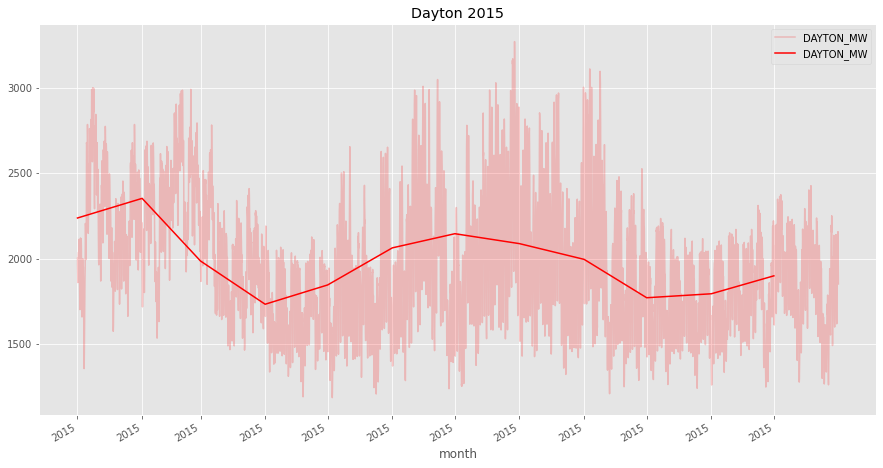

In [187]:
monthMeanValues = []
months = []
xticks = []

for i in (range(1,13)):
    monthMeanValues.append(year_2015[(year_2015.index.month == i)]['DAYTON_MW'].mean())
    months.append(datetime.datetime(2015, i, 1))
    xticks.append(datetime.datetime(2015, i, 1))

month = pd.DataFrame({'DAYTON_MW': monthMeanValues, 'month':months })
month = month.set_index('month')



base=year_2015.plot(color='red',alpha=0.20, figsize = (15, 8), xticks = xticks, title = 'Dayton 2015')
month.plot(color='red', alpha=1.0, ax=base)

labels = [item.get_text() for item in base.get_xticklabels()]
labels[1] = 'Testing'

plt.show()

In [168]:
data[data.index.year == 2015]

,DAYTON_MW
Datetime,
2015-01-01 00:00:00,2001.0
2015-12-31 01:00:00,1707.0
2015-12-31 02:00:00,1652.0
2015-12-31 03:00:00,1631.0
2015-12-31 04:00:00,1618.0
...,...
2015-01-01 20:00:00,2087.0
2015-01-01 21:00:00,2040.0
2015-01-01 22:00:00,1971.0


,DAYTON_MW
month,
2015-01-01,2236.934140
2015-02-01,2351.778274
2015-03-01,1985.445491
2015-04-01,1732.458333
2015-05-01,1845.358871
2015-06-01,2062.231944
2015-07-01,2145.064516
2015-08-01,2086.940860
2015-09-01,1994.895833
